In [1]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
import skimage.transform
import skimage.color
import skimage.filters
from skimage import img_as_ubyte, img_as_float
import itertools

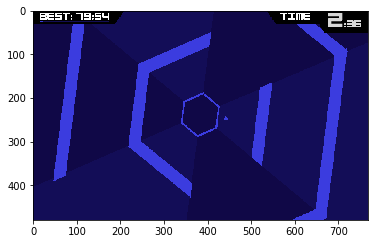

In [2]:
screen = cv2.imread('../screenshots/screenshot_1527480934.png')
plt.imshow(screen)

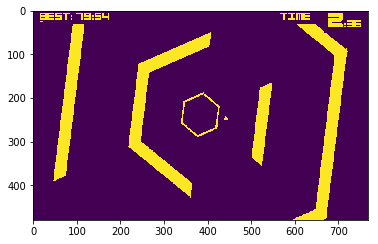

In [3]:
def rescale_intensity(frame):
    cropped_frame = frame[70:]
    imin, imax = np.min(cropped_frame), np.max(cropped_frame)
    return np.clip((frame - imin) / (imax - imin), 0, 1)

screen = skimage.color.rgb2gray(screen)
screen = rescale_intensity(screen) > 0.5

plt.imshow(screen)

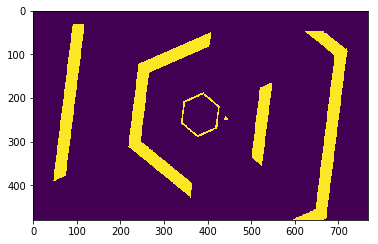

In [4]:
def remove_times(frame):
    frame[:30, :190] = 0
    frame[:48, 560:] = 0
    return frame

test = screen.copy()
plt.imshow(remove_times(test))

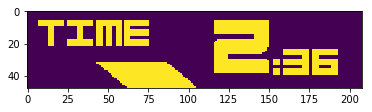

In [5]:
plt.imshow(screen[:48, 560:])

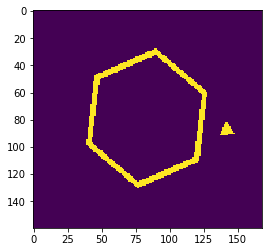

In [6]:
center = screen[160:320, 300:468]
plt.imshow(center)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)


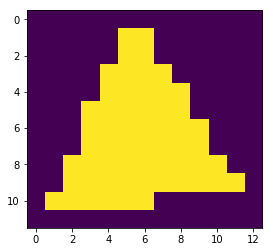

In [11]:
ship = screen[241:253, 436:449]
print(repr(ship.astype(np.uint8)))
plt.imshow(ship)

[246 441]


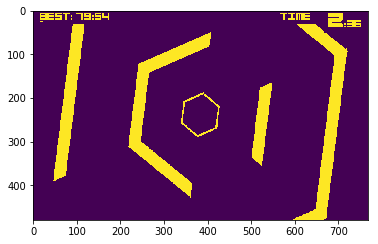

In [15]:
def find_ship_contour(frame):
    center = frame[160:320, 300:468]
    _, contours, _ = cv2.findContours(
        center,
        cv2.RETR_LIST,
        cv2.CHAIN_APPROX_SIMPLE,
        offset=(300, 160),
    )

    for contour in contours:
        approx = cv2.approxPolyDP(contour, 0.07 * cv2.arcLength(contour, True), True)

        if len(approx) == 3:
            return contour

screen_copy = img_as_ubyte(screen.copy())
ship_contour = find_ship_contour(screen_copy).astype(int)

ship_coords = np.mean(ship_contour, axis=0)[0][::-1].astype(int)

cv2.drawContours(screen_copy, [ship_contour], -1, 0, -1)

print(ship_coords)
# screen_copy[ship_coords[0], ship_coords[1]] = 0

plt.imshow(screen_copy)

0.10487693873023389
Distance to closest wall: 66


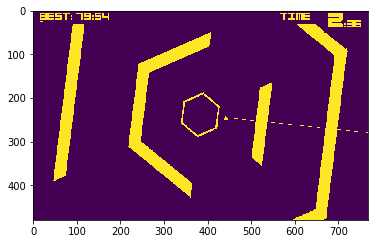

In [41]:
screen_copy = screen.copy()
center = np.array([480, 768]) / 2

angle = math.atan2(ship_coords[0] - center[0], ship_coords[1] - center[1])
print(angle)

# cast a ray out from the center to figure out distance to the closest wall

ray = []
for i in range(380):
    y = int(math.sin(angle) * i) + ship_coords[0]
    x = int(math.cos(angle) * i) + ship_coords[1]
    
    if y >= 480 or x >= 768:
        break
    
    ray.append(screen[y, x])
    screen_copy[y, x] = 1

chunks = [list(g) for k, g in itertools.groupby(ray)]
distance = len(chunks[1])
print("Distance to closest wall: {}".format(len(test[1])))
    
plt.imshow(screen_copy)

In [42]:
reward = distance - 30
print(reward)

36
